# CS 216 Project: March Madness
## Team Members: Angela Guan, Justin Zhao, Rebecca Shu, Sanjay Satish

The following is a Jupyter Notebook that holds our analysis for our CS216 Final Project. 

The focus of this project is to analyze exactly what makes Final Four teams in March Madness so successful.

Specifically, we will choose to examine the likelihood of certain teams to make it to the coveted Final Four (last four teams standing in the tournament) to see if we can visualize any  statistical patterns or trends and run a regression on the most meaningful statistical factors.

## Setup 

Here we load the necessary packages and libraries we will use for our analysis. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data 

To create our data, we combine the following datasets:

https://www.kaggle.com/annahuntington/mens-final-four-results-19392019
A dataset which documents the final 4 teams in the tournament each year, including their place in the tournament (1, 2 or 3rd - there are two teams that place 3rd in a bracket system). 

https://www.kaggle.com/andrewsundberg/college-basketball-dataset?select=cbb.csv
A dataset withb all NCAA MBB teams 2015-2020, has team information and basic statistics on each team 

https://www.kaggle.com/raddar/ncaa-men-538-team-ratings
A dataset with 538's team rankings since 2016

### Merging and loading data


Here, we load in each of our respective datasets and merge them to create our final dataset which will be used for analysis. Essentially, we produce a dataset where each row represents the statistics for team *i* in year *t* as well as their place in the tournament (1st, 2nd, or 3rd). This type of "panel" data allows us to better examine group averages for various statistical categories we may be interested in for analysis.

In [255]:
#Load 538 Data
five38_ratings = pd.read_csv("538ratingsMen.csv")
five38_ratings.rename(columns={'TeamName': 'School', 'Season': 'Year'}, inplace=True)
five38_ratings.replace("Loyola (IL)", "Loyola Chicago", inplace = True)

#Load NCAA aggregate data, only take seasons 2016-present 
collegebasketball = pd.read_csv("cbb.csv")
collegebasketball.rename(columns={'YEAR': 'Year', 'TEAM': 'School'}, inplace=True) 
collegebasketball = collegebasketball[collegebasketball["Year"] >= 2016]

#Load placement data, only take seasons 2016-present
placement = pd.read_csv("Final Four NCAA Division I Mens basketball Tournament.csv")
placement.rename(columns={'School ': 'School'}, inplace=True)
placement.replace("Loyola-Chicago", "Loyola Chicago", inplace = True)
placement = placement[placement["Year"] >= 2016]

In [256]:
collegebasketball.replace("Arizona St.", "Arizona State", inplace = True) 
collegebasketball.replace("Arkansas Little Rock", "Arkansas-Little Rock", inplace = True) 
collegebasketball.replace("Cal St. Bakersfield", "Cal State Bakersfield", inplace = True) 
collegebasketball.replace("Cal St. Fullerton", "Cal State Fullerton", inplace = True) 
collegebasketball.replace("East Tennessee St.", "East Tennessee State", inplace = True) 
collegebasketball.replace("Florida St.", "Florida State", inplace = True)
collegebasketball.replace("Fresno St.", "Fresno State", inplace = True) 
collegebasketball.replace("Gardner Webb", "Gardner-Webb", inplace = True) 
collegebasketball.replace("Georgia St.", "Georgia State", inplace = True) 
collegebasketball.replace("Iowa St.", "Iowa State", inplace = True) 
collegebasketball.replace("Jacksonville St.", "Jacksonville State", inplace = True) 
collegebasketball.replace("Kansas St.", "Kansas State", inplace = True) 
collegebasketball.replace("Kent St.", "Kent State", inplace = True) 
collegebasketball.replace("LIU Brooklyn", "Long Island University", inplace = True) 
collegebasketball.replace("Miami FL", "Miami (FL)", inplace = True)  
collegebasketball.replace("Michigan St.", "Michigan State", inplace = True) 
collegebasketball.replace("Mississippi St.", "Mississippi State", inplace = True) 
collegebasketball.replace("Murray St.", "Murray State", inplace = True) 
collegebasketball.replace("New Mexico St.", "New Mexico State", inplace = True) 
collegebasketball.replace("North Carolina St.", "North Carolina State", inplace = True) 
collegebasketball.replace("North Dakota St.", "North Dakota State", inplace = True) 
collegebasketball.replace("Ohio St.", "Ohio State", inplace = True) 
collegebasketball.replace("Oklahoma St.", "Oklahoma State", inplace = True) 
collegebasketball.replace("Oregon St.", "Oregon State", inplace = True) 
collegebasketball.replace("Penn", "Pennsylvania", inplace = True) 
collegebasketball.replace("Prairie View A&M", "Prairie View", inplace = True)
collegebasketball.replace("Saint Mary's", "Saint Mary's (CA)", inplace = True) 
collegebasketball.replace("San Diego St.", "San Diego State", inplace = True) 
collegebasketball.replace("SMU", "Southern Methodist", inplace = True) 
collegebasketball.replace("South Dakota St.", "South Dakota State", inplace = True) 
collegebasketball.replace("St. John's", "St. John's (NY)", inplace = True) 
collegebasketball.replace("TCU", "Texas Christian", inplace = True) 
collegebasketball.replace("UC Davis", "UC-Davis", inplace = True) 
collegebasketball.replace("UC Irvine", "UC-Irvine", inplace = True) 
collegebasketball.replace("UCF", "Central Florida", inplace = True) 
collegebasketball.replace("UMBC", "Maryland-Baltimore County", inplace = True) 
collegebasketball.replace("UNC Asheville", "North Carolina-Asheville", inplace = True) 
collegebasketball.replace("UNC Greensboro", "North Carolina-Greensboro", inplace = True) 
collegebasketball.replace("UNC Wilmington", "North Carolina-Wilmington", inplace = True) 
collegebasketball.replace("USC", "Southern California", inplace = True) 
collegebasketball.replace("Utah St.", "Utah State", inplace = True) 
collegebasketball.replace("VCU", "Virginia Commonwealth", inplace = True) 
collegebasketball.replace("Weber St.", "Weber State", inplace = True) 
collegebasketball.replace("Wichita St.", "Wichita State", inplace = True) 
collegebasketball.replace("Wright St.", "Wright State", inplace = True) 

In [257]:
five38_ratings.head()

,Year,TeamID,School,538rating
0,2016,1242,Kansas,94.46
1,2016,1314,North Carolina,93.94
2,2016,1438,Virginia,92.46
3,2016,1277,Michigan State,91.84
4,2016,1328,Oklahoma,89.96


In [258]:
collegebasketball.head()

,School,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Year
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019


In [259]:
basketballstats = collegebasketball[collegebasketball.POSTSEASON.notnull()]

In [260]:
basketballstats['final_four'] = 0

<ipython-input-260-387fe251b745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketballstats['final_four'] = 0


In [261]:
basketballstats.loc[basketballstats['POSTSEASON'] == "Champions",'final_four'] = 1
basketballstats.loc[basketballstats['POSTSEASON'] == "2ND",'final_four'] = 1
basketballstats.loc[basketballstats['POSTSEASON'] == "F4",'final_four'] = 1

C:\Users\justi\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [262]:
basketballstats["win_percentage"] = basketballstats["W"]/basketballstats["G"]

<ipython-input-262-3792eeab4489>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketballstats["win_percentage"] = basketballstats["W"]/basketballstats["G"]


In [264]:
basketballstats1 = pd.merge(basketballstats, five38_ratings, on = ['School', 'Year'])

In [269]:
basketballstats1["elite_eight"] = 0
basketballstats1.loc[basketballstats1['POSTSEASON'] == "Champions",'elite_eight'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "2ND",'elite_eight'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "F4",'elite_eight'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "E8",'elite_eight'] = 1

In [277]:
basketballstats1["sweet_sixteen"] = 0
basketballstats1.loc[basketballstats1['POSTSEASON'] == "Champions",'sweet_sixteen'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "2ND",'sweet_sixteen'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "F4",'sweet_sixteen'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "E8",'sweet_sixteen'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "S16",'sweet_sixteen'] = 1

In [280]:
basketballstats1["r32"] = 0
basketballstats1.loc[basketballstats1['POSTSEASON'] == "Champions",'r32'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "2ND",'r32'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "F4",'r32'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "E8",'r32'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "S16",'r32'] = 1
basketballstats1.loc[basketballstats1['POSTSEASON'] == "R32",'r32'] = 1

In [62]:
placement

,Year,School,Conference,Host Region,"Place (1st, 2nt, 3rd)"
308,2016,North Carolina,Atlantic Coast,East,2
309,2016,Oklahoma,Big 12,West,3
310,2016,Syracuse,Atlantic Coast,MidWest,3
311,2016,Villanova,Big East,South,1
312,2017,Gonzaga,West Coast,West,2
313,2017,North Carolina,Atlantic Coast,South,1
314,2017,Oregon,Pacific- 12,MidWest,3
315,2017,South Carolina,Southeastern,East,3
316,2018,Kansas,Big 12,MidWest,3
317,2018,Loyola Chicago,Missouri Valley,South,3


In [7]:
# Merging datasets: 

first = pd.merge(five38_ratings, placement, on = 'School')
first = first[(first.Year_x == first.Year_y)]
first.drop(columns=['Year_y'], inplace = True)
first.rename(columns={'Year_x': 'Year', "Place (1st, 2nt, 3rd)": "Place"}, inplace=True)

# Finishing Merge to Master Dataset

master = pd.merge(first, collegebasketball, on = 'School')
master = master[(master.Year_x == master.Year_y)]
master.drop(columns=['Year_y'], inplace = True)
master.rename(columns={'Year_x': 'Year', "Conference  ": "Conference"}, inplace=True)
master.sort_values(by=['Year', "Place"])

,Year,TeamID,School,538rating,Conference,Host Region,Place,CONF,G,W,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
24,2016,1437,Villanova,91.29,Big East,South,1,BE,40,35,...,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0
4,2016,1314,North Carolina,93.94,Atlantic Coast,East,2,ACC,40,33,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0
20,2016,1328,Oklahoma,89.96,Big 12,West,3,B12,37,29,...,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0
40,2016,1393,Syracuse,82.69,Atlantic Coast,MidWest,3,ACC,37,23,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0
9,2017,1314,North Carolina,91.74,Atlantic Coast,South,1,ACC,39,33,...,34.3,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0
36,2017,1211,Gonzaga,93.71,West Coast,West,2,WCC,39,37,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0
33,2017,1332,Oregon,87.30,Pacific- 12,MidWest,3,P12,38,33,...,34.4,26.3,54.5,46.1,38.0,31.2,68.4,6.0,F4,3.0
52,2017,1376,South Carolina,83.08,Southeastern,East,3,SEC,36,26,...,40.2,44.5,45.9,45.4,33.4,30.6,69.6,1.7,F4,7.0
29,2018,1437,Villanova,94.92,Big East,East,1,BE,40,36,...,29.4,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0
48,2018,1276,Michigan,88.54,Big Ten,West,2,B10,40,33,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0


## Analysis and Plotting

First, we can do a preliminary exploration of the data we have to see if we can identify any clear trends or patterns.

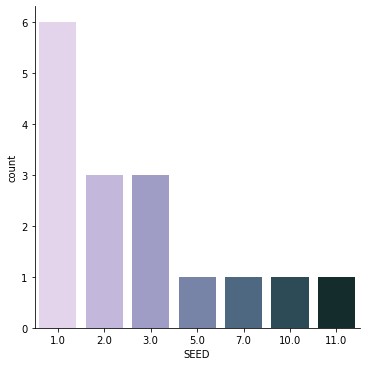

In [26]:
# Distribution of seeds
sns.catplot(x="SEED", kind="count", palette="ch:2.25", data=master)

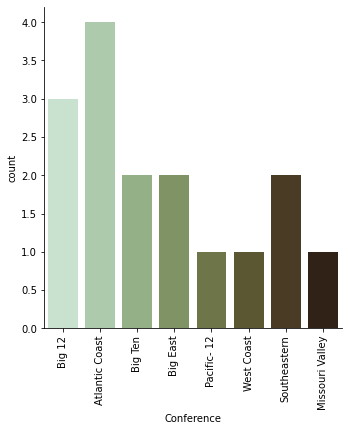

In [9]:
# Conferences of Final Four Teams
ax = sns.catplot(x="Conference", kind="count", palette="ch:1", data=master)
ax.set_xticklabels(rotation=90)
ax

From the two visualizations above, we are initially exploring the distribution of seeds and conferences for final four teams in the past four years. We can see that the vast majority of teams that made it to the final four are 1, 2, and 3 seeds, which makes sense, but there are also four teams that were seeded 5, 7, 10, and 11 that made it to the final four in the past four years. One of them notably was Loyola Chicago, who made an insane tournament run in 2018, beating Kansas State 72-68 in the elite eight to become the fourth 11th seed in history to make it that far. 

Next, looking at the distribution of athletic conferences of the final four teams, we see that it is relatively even within the past four years, with most teams making it a part of the ACC or Big 12, which makes sense since those conferences are home to the basketball powerhouses of the country - Blue Bloods like Duke, UNC, or Kansas. The Big Ten, Big East, and SEC conferences have also had their fair share of final four teams in the past four years, which makes sense due to traditionally strong basketball schools like Michigan, Villanova, and Kentucky. 

Next, we chose to look a little closer at the 538rating score. 

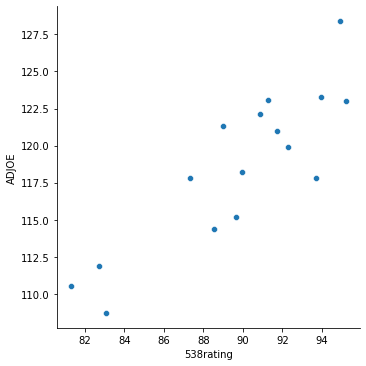

In [12]:
sns.relplot(x = "538rating", y = "ADJOE", data = master)

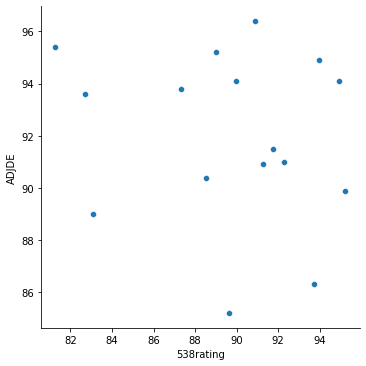

In [13]:
sns.relplot(x = "538rating", y = "ADJDE", data = master)

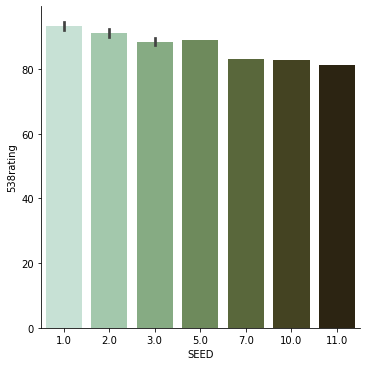

In [28]:
sns.catplot(x = "SEED", y = "538rating", kind = "bar", data = master, palette = "ch: 4.15")

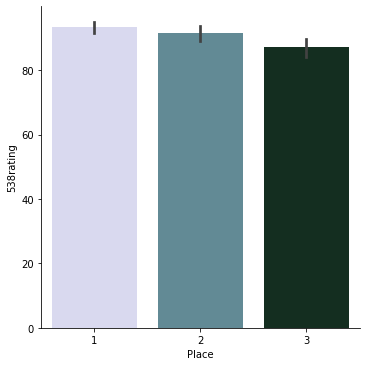

In [23]:
sns.catplot(x = "Place", y = "538rating", kind = "bar", data = master, palette = "ch: 1.95")

From the scatterplots above, we see the correlation between the calculated 538 rating score as well as Adjusted Offensive Efficiency and Adjusted Defensive Efficiency for the 16 Final Four teams from 2016-2019. It is important to note that there is a clear positive association between 538 rating and ADJOE, but almost no association to a slightly negative association between 538 rating and ADJDE, meaning that offensive efficiency is likely weighted much higher and taken into much more consideration when calculating the 538 rating for a particular team. According to the metadata, the ADJOE is calculated by an estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense, and likewise the ADJDE is calculated the same way (but for points allowed). 

From the bar graphs above, it appears that 538 rating is positively associated with both seeding and placement, which does intuitively make sense. The 1 and 2 seeds have the highest average of 538 ratings out of all the other teams, and the teams that finished 1st in the entire tournament also have the highest average 538 rating. Thus, there appears to be at least some predictive power behind this score. 


## Regression Analysis

Now, we can fit our logistic regression model using the response variable `final_four`, which is equal to 1 if a particular team has been to the final four in the years 2016-2019. For this portion, we chose to filter the collegebasketball dataset to include only teams that were qualified to play in the March Madness tournament in the years 2016-2019. The reason why we only wanted to focus on tournament teams and not all D1 teams in general is because our research question is primarily focused on predicting which teams will make it to the Final Four stage within the tournament. We will fit two logistic regression models to analyze all the factors at play. The first logistic regression model will have statistics and metrics initially found in the collegebasketball dataset, including Adjusted Offensive Efficiency, Adjusted Defensive Efficiency, Seed, Win Percentage, Power Rating, Offensive Rebound Rate, Free Throw Rate, Two Point Shooting Percentage, Two Point Shooting Percentage Allowed, Three Point Shooting Percentage, Three Point Shooting Percentage Allowed, etc. The second logistic regression model will include the scores of each team from the 538rating dataset. Part of the reason for the separation was because we wanted to isolate the calculation of the predictive power of the 538 ratings, since they seem to be made independently by the 538 organization, and not an actual statistic that is tracked by the NCAA. Another main reason for the separation was to avoid issues with multicollinearity, as the calculation of 538 rating may be inherently correlated with many of the statistics in the collegebasketball dataset, as seen through some of the scatterplots in our exploratory data analysis. 

In [34]:
from scipy.stats import norm
def pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 


cbb_data = basketballstats[["ADJOE", "ADJDE", "BARTHAG", "FTR", "FTRD", "EFG_O", "EFG_D", "TOR", "TORD",
                            "ORB", "DRB", "2P_O", "2P_D", "3P_O", "3P_D", "SEED", "ADJ_T", "WAB",
                            "W"]].values

cbb_target = OrdinalEncoder().fit_transform(basketballstats[["final_four"]].values).ravel()


cbb_model = LogisticRegression(max_iter = 1000)
cbb_model.fit(X = cbb_data, y = cbb_target)

print(cbb_model.coef_)
print(pvalue(cbb_model, cbb_data))

[[ 0.59000395 -0.9093665   0.03721543 -0.20651056 -0.05432527 -0.29740464
   0.34421533  1.19838185 -0.58359913 -0.35793687  0.72339836 -0.67948936
   0.33428752 -0.08967962  0.31295969 -0.03134912  0.01268992 -1.06914646
   1.60443611]]
[5.68172935e-01 2.17696976e-01 1.21387471e-01 9.98933332e-01
 2.68308466e-01 7.68301208e-01 9.34876121e-01 9.31002454e-01
 7.76466958e-02 3.43606224e-01 1.77234666e-01 5.84052608e-02
 7.54268878e-01 8.91650818e-01 9.62745071e-01 8.82876274e-01
 9.50617516e-01 9.64113710e-01 5.09431053e-02 1.08714214e-04]


In [124]:
basketballstats["predicted_ff"] = cbb_model.predict(cbb_data)
basketballstats.head(10)

<ipython-input-124-08ad851ecf02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketballstats["predicted_ff"] = cbb_model.predict(cbb_data)


,School,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Year,final_four,win_percentage,predicted_ff
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.7,36.2,71.7,8.6,2ND,1.0,2016,1,0.825000,1.0
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,35.2,33.2,65.9,6.9,2ND,3.0,2018,1,0.825000,1.0
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.5,29.7,67.5,7.0,2ND,3.0,2019,1,0.815789,1.0
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,38.2,29.0,71.5,7.7,2ND,1.0,2017,1,0.948718,1.0
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,39.5,28.9,60.7,11.1,Champions,1.0,2019,1,0.921053,1.0
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,35.5,33.9,72.8,8.4,Champions,1.0,2017,1,0.846154,1.0
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,36.2,33.9,66.7,8.9,Champions,2.0,2016,1,0.875000,1.0
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,40.1,31.7,69.6,10.6,Champions,1.0,2018,1,0.900000,1.0
16,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,37.4,36.9,65.5,2.3,E8,6.0,2016,0,0.666667,0.0
17,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,40.3,34.7,61.9,8.6,E8,1.0,2016,0,0.783784,0.0


Classification accuracy: 0.9963235294117647


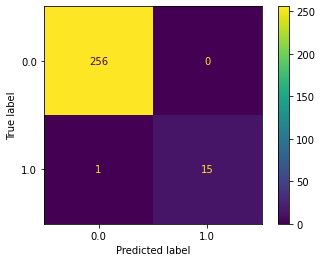

In [125]:
print("Classification accuracy:", cbb_model.score(cbb_data, cbb_target))

plot_confusion_matrix(cbb_model, cbb_data, cbb_target)

In [273]:
cbb_data1 = basketballstats1[["538rating"]].values

cbb_target1 = OrdinalEncoder().fit_transform(basketballstats1[["final_four"]].values).ravel()


cbb_model1 = LogisticRegression(max_iter = 1000)
cbb_model1.fit(X = cbb_data1, y = cbb_target1)

print(cbb_model1.coef_)
print(pvalue(cbb_model1, cbb_data1))

[[0.28286251]]
[3.61460278e-06 1.74030972e-05]


Classification accuracy: 0.9372693726937269


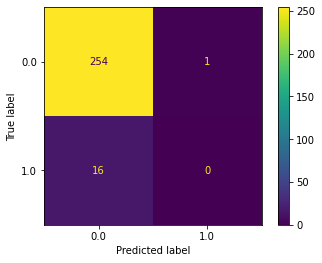

In [274]:
print("Classification accuracy:", cbb_model1.score(cbb_data1, cbb_target1))

plot_confusion_matrix(cbb_model1, cbb_data1, cbb_target1)

In [275]:
cbb_data2 = basketballstats1[["538rating"]].values

cbb_target2 = OrdinalEncoder().fit_transform(basketballstats1[["elite_eight"]].values).ravel()


cbb_model2 = LogisticRegression(max_iter = 1000)
cbb_model2.fit(X = cbb_data2, y = cbb_target2)

print(cbb_model2.coef_)
print(pvalue(cbb_model2, cbb_data2))

[[0.32651806]]
[1.05921871e-09 5.13620102e-09]


Classification accuracy: 0.9077490774907749


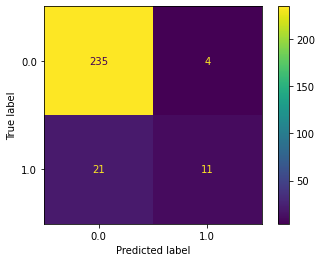

In [276]:
print("Classification accuracy:", cbb_model2.score(cbb_data2, cbb_target2))

plot_confusion_matrix(cbb_model2, cbb_data2, cbb_target2)

In [278]:
cbb_data3 = basketballstats1[["538rating"]].values

cbb_target3 = OrdinalEncoder().fit_transform(basketballstats1[["sweet_sixteen"]].values).ravel()


cbb_model3 = LogisticRegression(max_iter = 1000)
cbb_model3.fit(X = cbb_data3, y = cbb_target3)

print(cbb_model3.coef_)
print(pvalue(cbb_model3, cbb_data3))

[[0.34101317]]
[2.33590924e-13 8.04689648e-13]


Classification accuracy: 0.8265682656826568


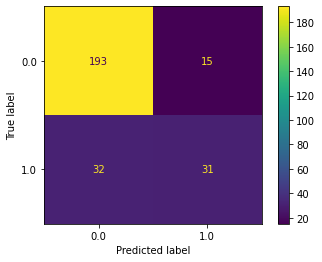

In [279]:
print("Classification accuracy:", cbb_model3.score(cbb_data3, cbb_target3))

plot_confusion_matrix(cbb_model3, cbb_data3, cbb_target3)

In [283]:
cbb_data4 = basketballstats1[["538rating"]].values

cbb_target4 = OrdinalEncoder().fit_transform(basketballstats1[["r32"]].values).ravel()


cbb_model4 = LogisticRegression(max_iter = 1000)
cbb_model4.fit(X = cbb_data4, y = cbb_target4)

print(cbb_model4.coef_)
print(pvalue(cbb_model4, cbb_data4))

[[0.28526774]]
[5.10702591e-15 4.88498131e-15]


Classification accuracy: 0.7453874538745388


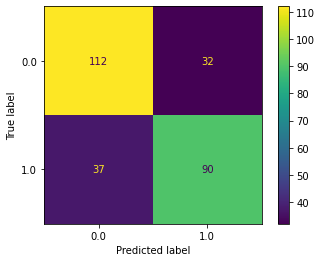

In [284]:
print("Classification accuracy:", cbb_model4.score(cbb_data4, cbb_target4))

plot_confusion_matrix(cbb_model4, cbb_data4, cbb_target4)